# Results postprocessing

In [15]:
from ase import io
from tqdm import tqdm

dir_snaps = "/home/qklmn/repos/rotor-gp/code/results/temp/temp_calc_dir_0/ase_calc_history/"

snapshot_list = []
for i in tqdm(range(0,10000)):
    snapshot_list.append( io.read( dir_snaps+str(i)+".xyz", format="extxyz") )

100%|██████████| 10000/10000 [00:37<00:00, 266.60it/s]


In [16]:
fmax_list = [snap.get_forces().max() for snap in snapshot_list]

In [36]:
forces_ipi_raw_xyz = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_ref/PREFIX.frc_00.xyz", index=":")

In [48]:
forces_ipi_raw_xyz[0].get_chemical_symbols()[100]

'C'

In [39]:
from ase import units
import numpy as np

forces_ipi = np.array( [s.get_positions()*(units.Hartree/units.Bohr) for s in forces_ipi_raw_xyz] )

In [60]:
fmax = forces_ipi[:,:,0].max(axis=1)
fmin = forces_ipi[:,:,0].min(axis=1)

fabs_mean = np.abs(forces_ipi).mean()
fabs_var = np.abs(forces_ipi).var()

fmax.shape

(10001,)

In [62]:
fabs_var

1.5663752644486202

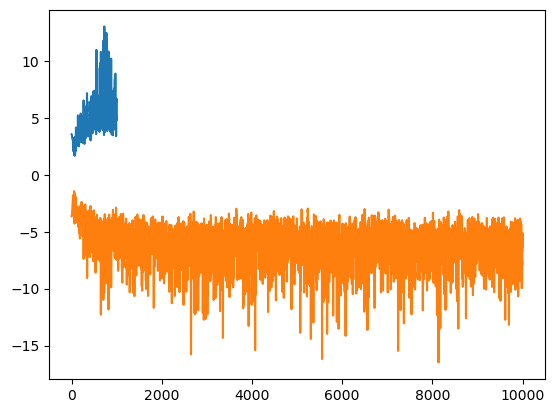

In [68]:
import matplotlib.pyplot as plt


plt.plot(fmax[0:1000])
plt.plot(fmin)

plt.show()

# Check statistics within training data

In [64]:
traj_dftb_2100 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_2100.traj", index=":")
traj_dftb_300 = io.read("/home/qklmn/data/datasets/rotors/different_temperatures/dftb/traj_300.traj", index=":")

In [66]:
fmax_300 = [snap.get_forces().max() for snap in traj_dftb_300]

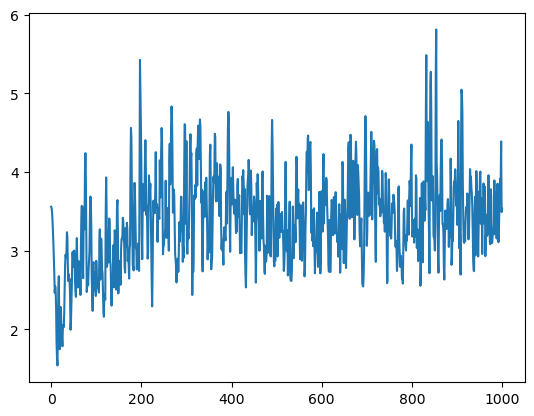

In [67]:
plt.plot(fmax_300)

## Check 1 vs. 16 beads

In [109]:
from ase import io

In [ ]:
traj_1 = io.read("/home/qklmn/repos/rotor-gp/code/pimd/output_dftb_1/PREFIX.pos_0.xyz